### Initial setup

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('datasets/gdp_by_country_1999_2022.csv', sep=',', header=0, thousands=",") # read the dataset from the CSV file
df_no_index = df.copy() # make a copy of the dataframe with no index
df.set_index('Country', inplace=True)


### Data transformation & Data analysis

#### Add a 'Continent' column to the dataframe, for analysis purposes

In [166]:
continent_countries = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Democratic Republic of', 'Congo, Republic of', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Swaziland', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Côte d\'Ivoire', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Kyrgyz Republic', 'Hong Kong SAR', 'Afghanistan, Rep. of.', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Lao People\'s Democratic Republic', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'Korea', 'Sri Lanka', 'Syrian Arab Republic', 'Taiwan Province of China', 'Tajikistan', 'Thailand', 'Timor-Leste, Dem. Rep. of', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen, Republic of'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Macedonia, Former Yugoslav Republic of', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas, The', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

def get_continent(country):
    for continent, countries in continent_countries.items():
        if country in countries:
            return continent
    return 'Unknown'

df_cont = df.copy()
df_cont['Continent'] = df.index.map(get_continent)

print(df_cont.head().to_string())

                         1999    2000    2001    2002    2003    2004     2005     2006     2007     2008     2009     2010     2012     2013     2014     2015     2016     2017     2018     2019     2020     2021     2022      Continent
Country                                                                                                                                                                                                                                      
Afghanistan, Rep. of.   0.000   0.000   0.000   4.084   4.585   5.971    7.309    8.399    9.892   11.513   13.318   15.406   19.248   21.555   24.304    0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000           Asia
Albania                 3.444   3.695   4.096   4.456   5.600   7.452    8.376    9.133   10.163   11.131   11.726   11.797   13.808   14.910   16.053   11.591   12.204   13.214   14.341   15.553   16.996   16.770   18.012         Europe
Algeria                48.845  54.749  55.181  5

#### Visualise the structure of the dataframe

In [167]:
print(df.head().to_string(line_width=1000))

                         1999    2000    2001    2002    2003    2004     2005     2006     2007     2008     2009     2010     2012     2013     2014     2015     2016     2017     2018     2019     2020     2021     2022
Country                                                                                                                                                                                                                       
Afghanistan, Rep. of.   0.000   0.000   0.000   4.084   4.585   5.971    7.309    8.399    9.892   11.513   13.318   15.406   19.248   21.555   24.304    0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000
Albania                 3.444   3.695   4.096   4.456   5.600   7.452    8.376    9.133   10.163   11.131   11.726   11.797   13.808   14.910   16.053   11.591   12.204   13.214   14.341   15.553   16.996   16.770   18.012
Algeria                48.845  54.749  55.181  57.053  68.013  85.016  102.380  114.322  116.158  126.889  1

#### Describe the numerical contents of the dataframe

In [168]:
print(df.describe().to_string(line_width=1000))

              1999         2000          2001          2002          2003          2004          2005          2006          2007          2008          2009          2010          2012          2013          2014          2015          2016          2017          2018          2019          2020          2021          2022
count   180.000000   180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000    180.000000
mean    171.770611   176.560339    175.371694    182.479317    204.966144    230.450128    248.573867    267.829694    286.582256    304.212356    317.417494    335.458594    370.459183    391.113289    413.727172    402.579306    416.266039    439.991744    465.477400    493.288628    523.746856    516.611517    556.795356
std     799.068940   8

#### Relevant analysis: Mean GDP evolution over the years

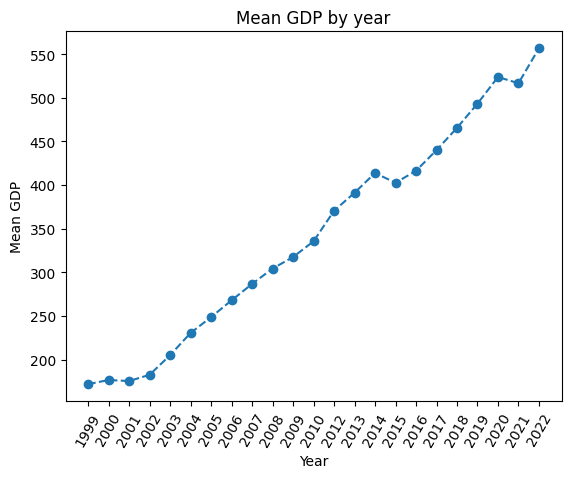

In [169]:
mean = df.mean()
plt.plot(mean, marker='o', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Mean GDP')
plt.title('Mean GDP by year')
plt.xticks(rotation=60)
plt.show()

#### Relevant analysis: Mean GDP evolution over the years for each continent

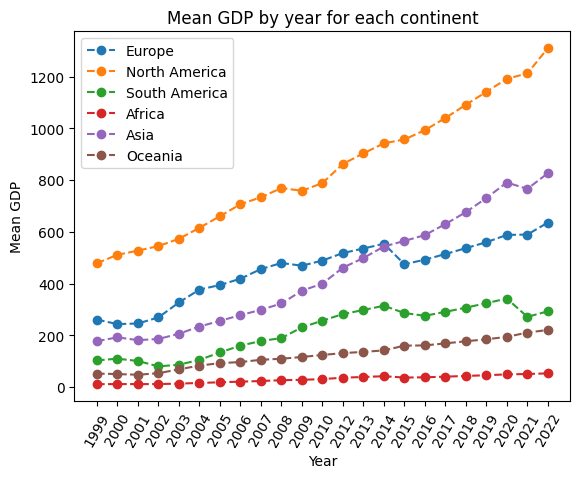

In [170]:
europe_gdp = df_cont[df_cont['Continent'] == 'Europe'].select_dtypes(include=[np.number]) # exclude the 'Continent' column from the selection
na_gdp = df_cont[df_cont['Continent'] == 'North America'].select_dtypes(include=[np.number])
sa_gdp = df_cont[df_cont['Continent'] == 'South America'].select_dtypes(include=[np.number])
africa_gdp = df_cont[df_cont['Continent'] == 'Africa'].select_dtypes(include=[np.number])
asia_gdp = df_cont[df_cont['Continent'] == 'Asia'].select_dtypes(include=[np.number])
oceania_gdp = df_cont[df_cont['Continent'] == 'Oceania'].select_dtypes(include=[np.number])
plt.plot(europe_gdp.mean(), marker='o', linestyle='--', label='Europe')
plt.plot(na_gdp.mean(), marker='o', linestyle='--', label='North America')
plt.plot(sa_gdp.mean(), marker='o', linestyle='--', label='South America')
plt.plot(africa_gdp.mean(), marker='o', linestyle='--', label='Africa')
plt.plot(asia_gdp.mean(), marker='o', linestyle='--', label='Asia')
plt.plot(oceania_gdp.mean(), marker='o', linestyle='--', label='Oceania')
plt.xlabel('Year')
plt.ylabel('Mean GDP')
plt.title('Mean GDP by year for each continent')
plt.xticks(rotation=60)
plt.legend()
plt.show()


#### Relevant analysis: Romania's GDP growth compared to other countries

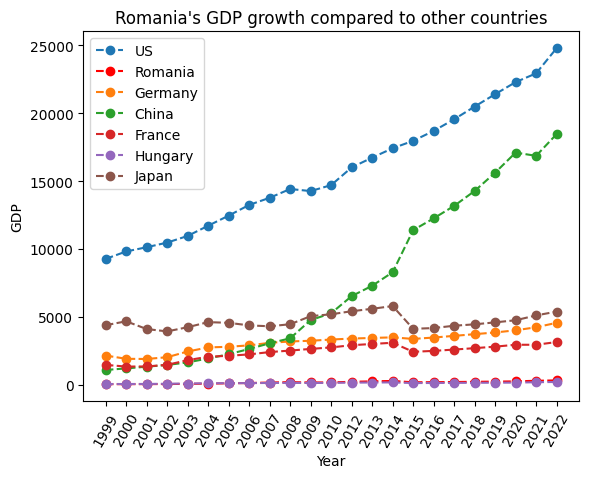

In [171]:
us_gdp = df.loc['United States']
ro_gdp = df.loc['Romania']
ge_gdp = df.loc['Germany']
ch_gdp = df.loc['China']
fr_gdp = df.loc['France']
hu_gdp = df.loc['Hungary']
jp_gdp = df.loc['Japan']
plt.plot(us_gdp, marker='o', linestyle='--', label='US')
plt.plot(ro_gdp, marker='o', linestyle='--', label='Romania', color='r')
plt.plot(ge_gdp, marker='o', linestyle='--', label='Germany')
plt.plot(ch_gdp, marker='o', linestyle='--', label='China')
plt.plot(fr_gdp, marker='o', linestyle='--', label='France')
plt.plot(hu_gdp, marker='o', linestyle='--', label='Hungary')
plt.plot(jp_gdp, marker='o', linestyle='--', label='Japan')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Romania\'s GDP growth compared to other countries')
plt.xticks(rotation=60)
plt.legend()
plt.show()

#### Relevant analysis: Countries with the highest GDP growth

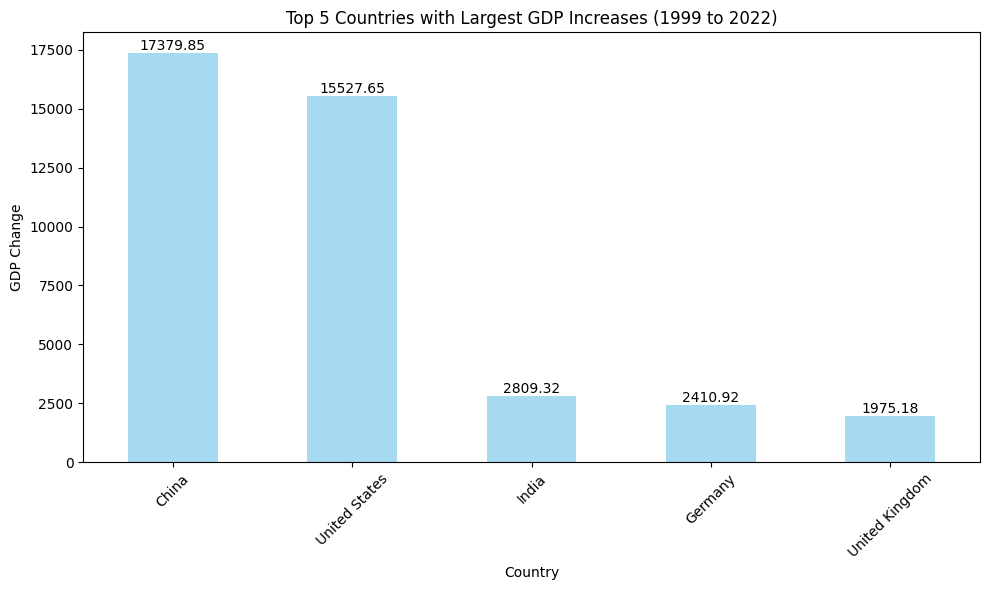

In [172]:
# Calculate the GDP increase for each country
gdp_increase = df['2022'] - df['1999']

# Sort countries based on GDP increase
top_increases = gdp_increase.sort_values(ascending=False).head(5)  # Top 5 countries with largest GDP increases

# Plot the top countries with the largest GDP increases
plt.figure(figsize=(10, 6))
top_increases.plot(kind='bar', color='skyblue', label='Largest GDP Increases', alpha=0.75)
plt.title('Top 5 Countries with Largest GDP Increases (1999 to 2022)')
plt.xlabel('Country')
plt.ylabel('GDP Change')
plt.xticks(rotation=45)
for i in range(len(top_increases)):
    value = top_increases.iloc[i]
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### Relevant analysis: Countries with the biggest GDP decrease

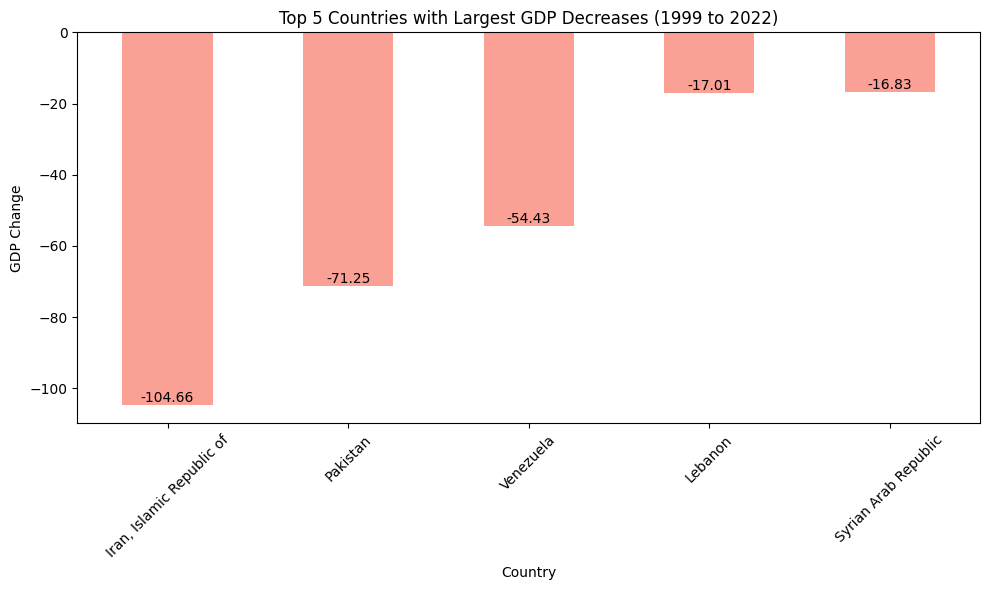

In [173]:
# Calculate the GDP increase for each country
gdp_increase = df['2022'] - df['1999']

# Sort countries based on GDP increase
top_decreases = gdp_increase.sort_values().head(5)  # Top 5 countries with largest GDP decreases

# Plot the top countries with the largest GDP decreases
plt.figure(figsize=(10, 6))
top_decreases.plot(kind='bar', color='salmon', label='Largest GDP Decreases', alpha=0.75)
plt.title('Top 5 Countries with Largest GDP Decreases (1999 to 2022)')
plt.xlabel('Country')
plt.ylabel('GDP Change')
plt.xticks(rotation=45)
for i in range(len(top_decreases)):
    value = top_decreases.iloc[i]
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Building the model

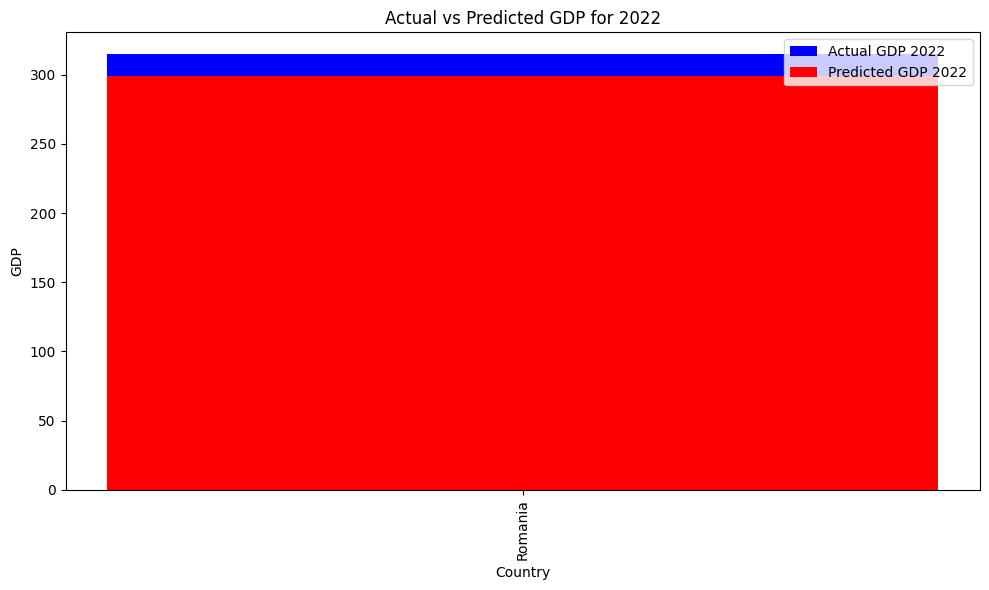

In [188]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
df2 = df_no_index.copy()

X = df2.drop(columns=['Country', '2022'])
y = df2['2022']

model.fit(X, y)

predictions = model.predict(X)

df2['Predicted 2022'] = predictions

# print(df_no_index[['Country', '2022', 'Predicted 2022']])

fr_predicted_gdp = df2[df2['Country'] == 'France'][['Country', '2022', 'Predicted 2022']]
ro_predicted_gdp = df2[df2['Country'] == 'Romania'][['Country', '2022', 'Predicted 2022']]
us_predicted_gdp = df2[df2['Country'] == 'United States'][['Country', '2022', 'Predicted 2022']]

plt.figure(figsize=(10, 6))
plt.bar(ro_predicted_gdp['Country'], ro_predicted_gdp['2022'], color='b', label='Actual GDP 2022')
plt.bar(ro_predicted_gdp['Country'], ro_predicted_gdp['Predicted 2022'], color='r', label='Predicted GDP 2022')

plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('Actual vs Predicted GDP for 2022')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# print(df2[df2['Country'] == 'France'][['Country', '2022', 'Predicted 2022']])

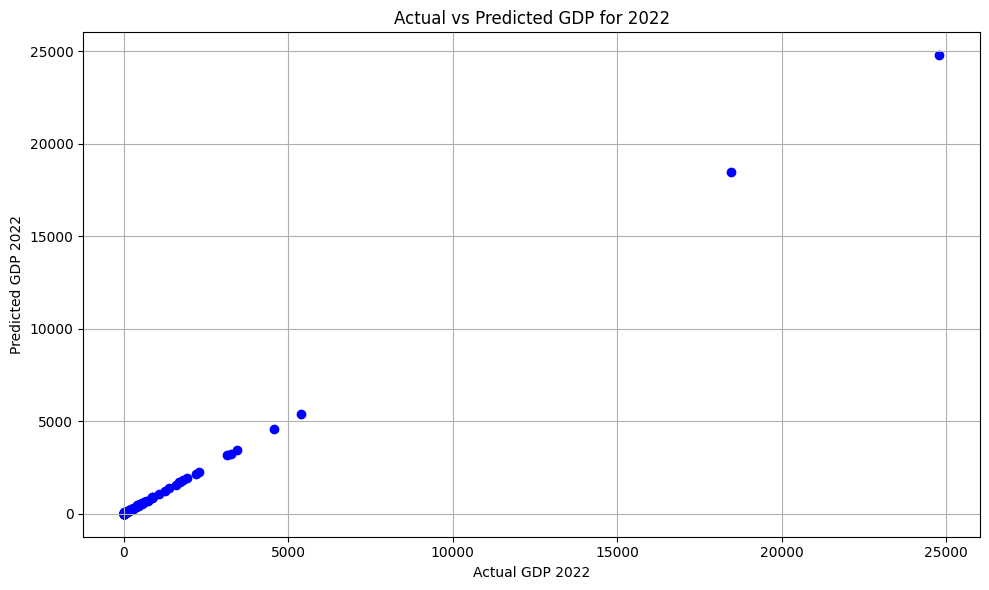

In [182]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['2022'], df2['Predicted 2022'], color='b')
# plt.plot([df2['2022'].min(), df2['2022'].max()], [df2['2022'].min(), df2['2022'].max()], color='r', linestyle='--')
plt.xlabel('Actual GDP 2022')
plt.ylabel('Predicted GDP 2022')
plt.title('Actual vs Predicted GDP for 2022')
plt.grid(True)
plt.tight_layout()
plt.show()

### Training the model

### Predictions and Evaluations